In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import kagglehub
import os

In [14]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("emirhanai/social-media-usage-and-emotional-well-being")
print("Path to dataset files:", path)

# Find the CSV file
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
data_path = os.path.join(path, csv_file)

# Debug: Print first few lines as raw text to check structure
with open(data_path, "r", encoding="utf-8") as file:
    for _ in range(5):  # Print first 5 lines
        print(file.readline().strip())

# Try loading the dataset with error handling
try:
    data = pd.read_csv(data_path, on_bad_lines="skip")  # Skip problematic rows
    print("Dataset loaded successfully!")
except Exception as e:
    print("Error loading dataset:", e)

# Display dataset info
print("Dataset Overview:")
print(data.head())
print(data.info())

Path to dataset files: /Users/umarkhan/.cache/kagglehub/datasets/emirhanai/social-media-usage-and-emotional-well-being/versions/1
User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion

10,31,Male,Instagram,170,5,80,20,35,Happiness

877,32,Female,Instagram,155,6,75,25,38,Happiness
Dataset loaded successfully!
Dataset Overview:
   User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       10  31        Male  Instagram                         170   
1      877  32      Female  Instagram                         155   
2      230  26  Non-binary   Facebook                          45   
3      876  28  Non-binary   Snapchat                         115   
4      376  28  Non-binary   Snapchat                         115   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              5                      80                         20   
1           

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Clean column names (remove spaces, standardize format)
data.columns = data.columns.str.strip().str.replace(r"\s+", "_", regex=True)
print("\n✅ Updated Column Names:", list(data.columns))

# Define expected numeric features
numeric_features = [
    "Daily_Usage_Time", 
    "Posts_Per_Day", 
    "Likes_Received_Per_Day", 
    "Comments_Received_Per_Day", 
    "Messages_Sent_Per_Day"
]

# Keep only existing numeric columns
existing_numeric_features = [col for col in numeric_features if col in data.columns]

# Convert to numeric and handle missing values with column mean
data.loc[:, existing_numeric_features] = data.loc[:, existing_numeric_features].apply(pd.to_numeric, errors='coerce')
data.loc[:, existing_numeric_features] = data.loc[:, existing_numeric_features].fillna(data[existing_numeric_features].mean())

# Encode the target variable (Dominant_Emotion) if it exists
if "Dominant_Emotion" in data.columns:
    label_encoder = LabelEncoder()
    data["Dominant_Emotion"] = label_encoder.fit_transform(data["Dominant_Emotion"])
    
    # Print encoding mapping
    print("\n🎯 Encoded Target Variable Mapping:")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
else:
    print("\n⚠️ 'Dominant_Emotion' column not found in dataset.")

# Display final dataset overview
print("\n📊 Processed Dataset Overview:")
print(data.head())
print("\n🔍 Data Info:")
print(data.info())



✅ Updated Column Names: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time_(minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']

🎯 Encoded Target Variable Mapping:
{'Agression': np.int64(0), 'Anger': np.int64(1), 'Anxiety': np.int64(2), 'Boredom': np.int64(3), 'Happiness': np.int64(4), 'Neutral': np.int64(5), 'Sadness': np.int64(6), nan: np.int64(7)}

📊 Processed Dataset Overview:
   User_ID Age      Gender   Platform  Daily_Usage_Time_(minutes)  \
0       10  31        Male  Instagram                         170   
1      877  32      Female  Instagram                         155   
2      230  26  Non-binary   Facebook                          45   
3      876  28  Non-binary   Snapchat                         115   
4      376  28  Non-binary   Snapchat                         115   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              5                      80     

/var/folders/12/jzfmr6ws501_wp4_ngzx2lrw0000gn/T/ipykernel_15941/1432454043.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[:, existing_numeric_features] = data.loc[:, existing_numeric_features].fillna(data[existing_numeric_features].mean())


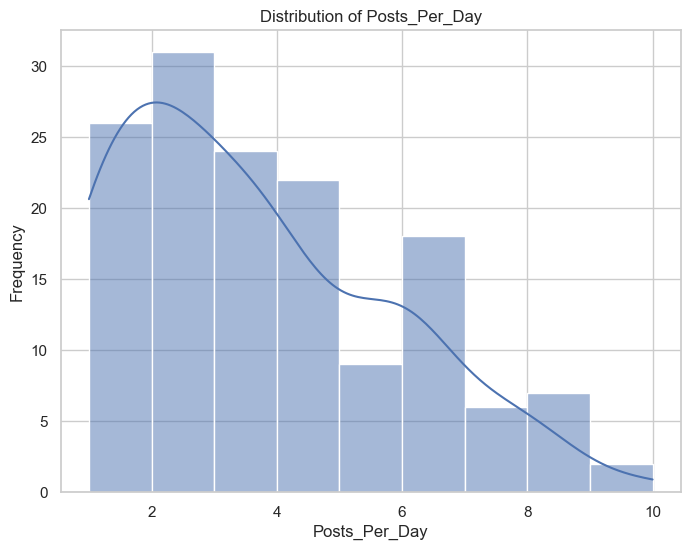

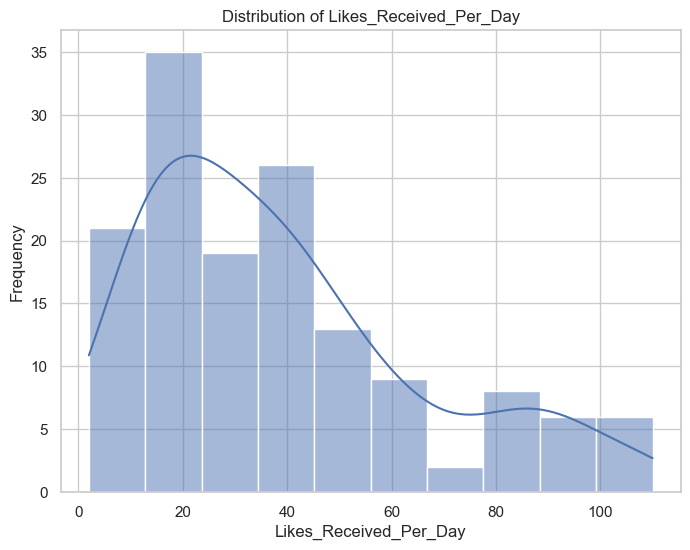

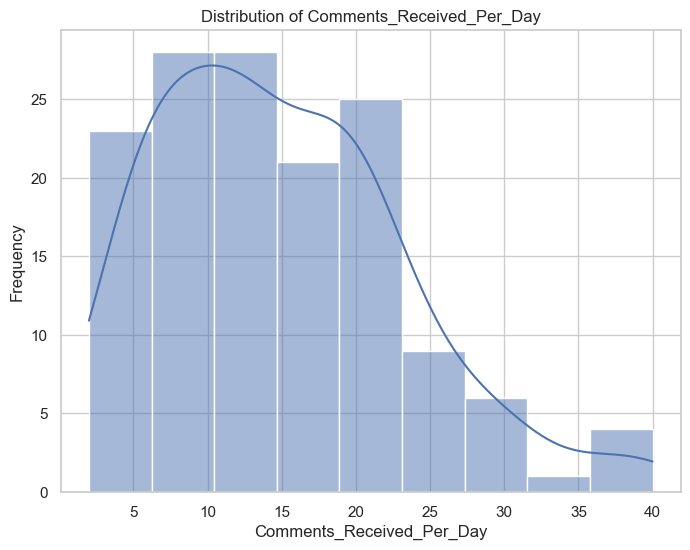

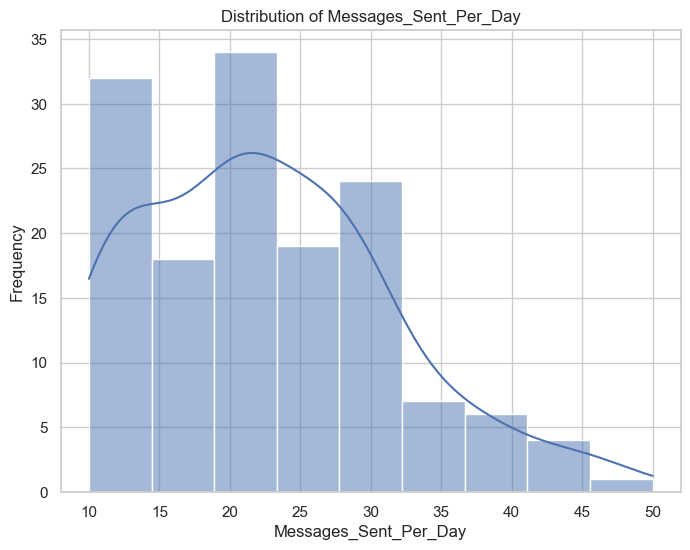

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Visualize the distribution of numeric features
for feature in existing_numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


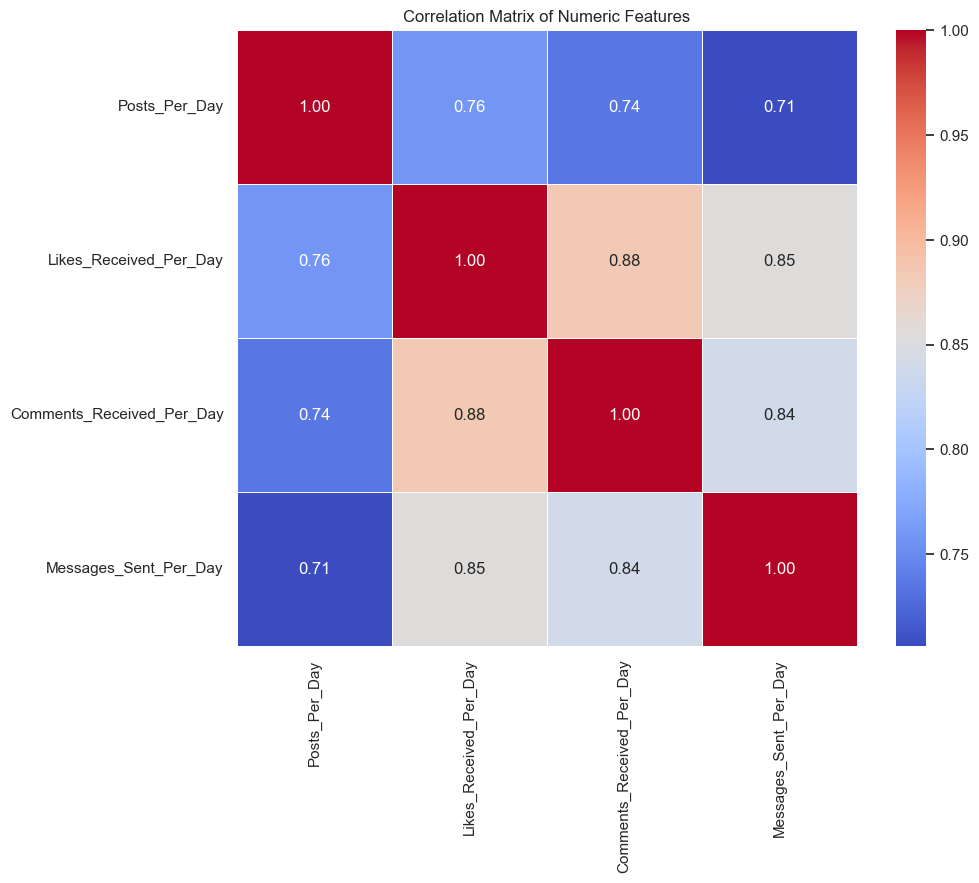

In [19]:
# Correlation heatmap of numeric features
correlation_matrix = data[existing_numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [20]:
# Statistical summary of numeric features
print("\n📊 Dataset Summary Statistics:")
print(data[existing_numeric_features].describe())



📊 Dataset Summary Statistics:
       Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day
count     145.000000              145.000000                 145.000000
mean        3.572414               39.020690                  14.972414
std         2.146524               26.639952                   8.298213
min         1.000000                2.000000                   2.000000
25%         2.000000               20.000000                   8.000000
50%         3.000000               33.000000                  14.000000
75%         5.000000               50.000000                  20.000000
max        10.000000              110.000000                  40.000000


/var/folders/12/jzfmr6ws501_wp4_ngzx2lrw0000gn/T/ipykernel_15941/882977735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dominant_Emotion", data=data, palette="Set2")


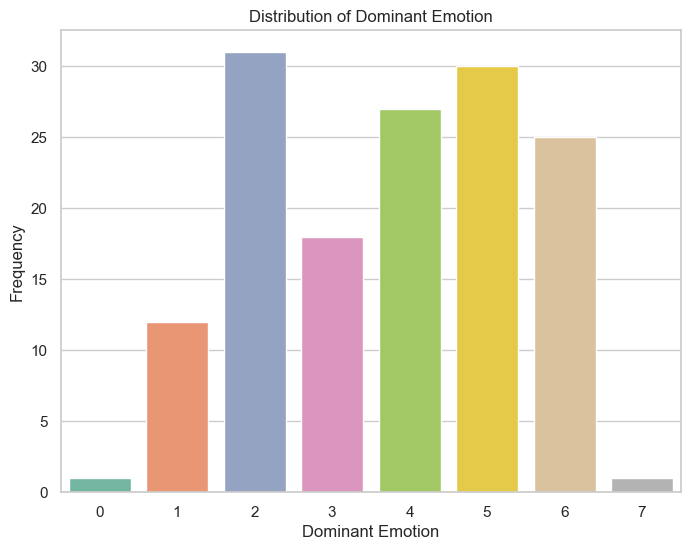

In [21]:
if "Dominant_Emotion" in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x="Dominant_Emotion", data=data, palette="Set2")
    plt.title('Distribution of Dominant Emotion')
    plt.xlabel('Dominant Emotion')
    plt.ylabel('Frequency')
    plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[existing_numeric_features]  # Use numeric features for the model
y = data["Dominant_Emotion"]  # Assuming we are predicting "Dominant_Emotion"

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 116
Testing set size: 29


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))



Logistic Regression Model Evaluation:
Accuracy: 0.41379310344827586
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.25      0.33      0.29         6
           3       0.25      0.33      0.29         3
           4       1.00      0.33      0.50         3
           5       0.40      0.67      0.50         6
           6       0.50      0.33      0.40         6

    accuracy                           0.41        29
   macro avg       0.57      0.40      0.42        29
weighted avg       0.54      0.41      0.43        29



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Classifier Model Evaluation:
Accuracy: 0.41379310344827586
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.20      0.29         5
           2       0.67      0.33      0.44         6
           3       0.33      0.67      0.44         3
           4       0.50      0.67      0.57         3
           5       0.44      0.67      0.53         6
           6       0.33      0.17      0.22         6

    accuracy                           0.41        29
   macro avg       0.40      0.39      0.36        29
weighted avg       0.47      0.41      0.40        29



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [25]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine (SVM) model
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
print("\nSupport Vector Machine (SVM) Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Support Vector Machine (SVM) Model Evaluation:
Accuracy: 0.3793103448275862
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.21      0.50      0.30         6
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3
           5       0.46      1.00      0.63         6
           6       0.00      0.00      0.00         6

    accuracy                           0.38        29
   macro avg       0.28      0.36      0.29        29
weighted avg       0.24      0.38      0.28        29



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Create a dictionary to store model names and their corresponding evaluation metrics
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "Support Vector Machine (SVM)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
}

# Generate the classification reports for detailed evaluation metrics
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Add precision, recall, and F1-score from the classification reports
model_results["Precision"] = [
    logreg_report["weighted avg"]["precision"],
    rf_report["weighted avg"]["precision"],
    svm_report["weighted avg"]["precision"]
]

model_results["Recall"] = [
    logreg_report["weighted avg"]["recall"],
    rf_report["weighted avg"]["recall"],
    svm_report["weighted avg"]["recall"]
]

model_results["F1-Score"] = [
    logreg_report["weighted avg"]["f1-score"],
    rf_report["weighted avg"]["f1-score"],
    svm_report["weighted avg"]["f1-score"]
]

# Convert the results into a DataFrame for better readability
model_comparison_df = pd.DataFrame(model_results)

# Display the comparison table
print("\nModel Comparison Summary:")
print(model_comparison_df)



Model Comparison Summary:
                          Model  Accuracy  Precision    Recall  F1-Score
0           Logistic Regression  0.413793   0.539655  0.413793  0.425123
1                 Random Forest  0.413793   0.471264  0.413793  0.402627
2  Support Vector Machine (SVM)  0.379310   0.243274  0.379310  0.275499


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NameError: name 'log_reg_accuracy' is not defined